In [40]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns

#Import the dataset from the URL
df_url =' https://raw.githubusercontent.com/AISWARYALAKSHMI128/HR_Attrition_Prediction/main/test.csv'
url_content = requests.get(df_url, verify=False).content

#Read the imported CSV data into a DataFrame
hrdata = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
hrdata.shape  #Display number of rows and columns

(14900, 24)

In [41]:
hrdata.head(3).T        # Display the first 3 rows of the dataset, transposed

,0,1,2
Employee ID,52685,30585,54656
Age,36,35,50
Gender,Male,Male,Male
Years at Company,13,7,7
Job Role,Healthcare,Education,Education
Monthly Income,8029,4563,5583
Work-Life Balance,Excellent,Good,Fair
Job Satisfaction,High,High,High
Performance Rating,Average,Average,Average
Number of Promotions,1,1,3


In [42]:
hrdata.info()       #Display the data types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               14900 non-null  int64 
 1   Age                       14900 non-null  int64 
 2   Gender                    14900 non-null  object
 3   Years at Company          14900 non-null  int64 
 4   Job Role                  14900 non-null  object
 5   Monthly Income            14900 non-null  int64 
 6   Work-Life Balance         14900 non-null  object
 7   Job Satisfaction          14900 non-null  object
 8   Performance Rating        14900 non-null  object
 9   Number of Promotions      14900 non-null  int64 
 10  Overtime                  14900 non-null  object
 11  Distance from Home        14900 non-null  int64 
 12  Education Level           14900 non-null  object
 13  Marital Status            14900 non-null  object
 14  Number of Dependents  

In [43]:
hrdata.isnull().sum()       #Display the number of missing values in each column

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [44]:
hrdata.nunique()        #Display the number of unique values in each column

,0
Employee ID,14900
Age,42
Gender,2
Years at Company,51
Job Role,5
Monthly Income,6928
Work-Life Balance,4
Job Satisfaction,4
Performance Rating,4
Number of Promotions,5


In [45]:
hrdata.describe()       #Display the summary statistics of the dataset

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,37339.022081,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,21453.129293,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,5.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18825.500000,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,37433.000000,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,55857.500000,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,74471.000000,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


**EXPLORATORY DATA ANALYSIS**

In [46]:
hrdata_number=hrdata.select_dtypes(include=[np.number])           #Select the numerical columns
hrdata_object = hrdata.select_dtypes(include='object').columns      #Select categorical columns

**Numerical Distribution of Columns**

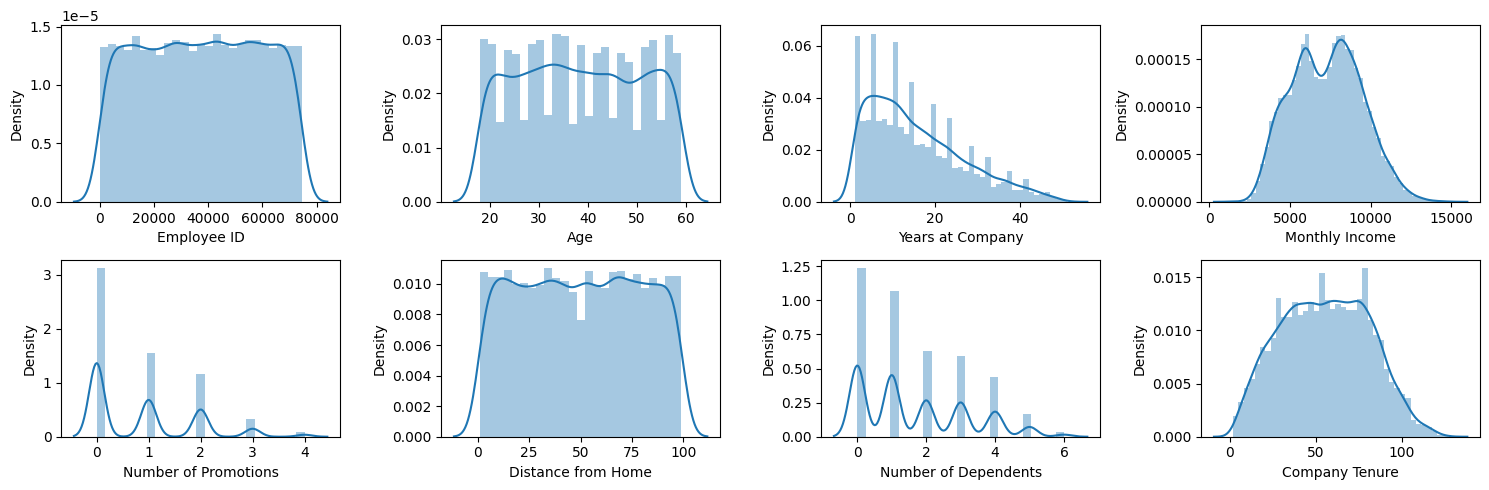

In [47]:
i = 1
plt.figure(figsize=(15,5))
# Loop through each feature in the hrdata_number list
for feature_name in hrdata_number:
    plt.subplot(2,4,i)
    sns.distplot(hrdata[feature_name])    # Plot the distribution of the current feature
    i+=1

plt.tight_layout()
plt.show()



*   Age, and Distance from home show Uniform Distribution.
*   Monthly Income and Company Tenure show somewhat Normal Distribution.
*   Years at Company show Right-Skewed data.
*   Number of Promotions and Dependents shows a tail towards higher values.





**Categorical Distribution of Columns**

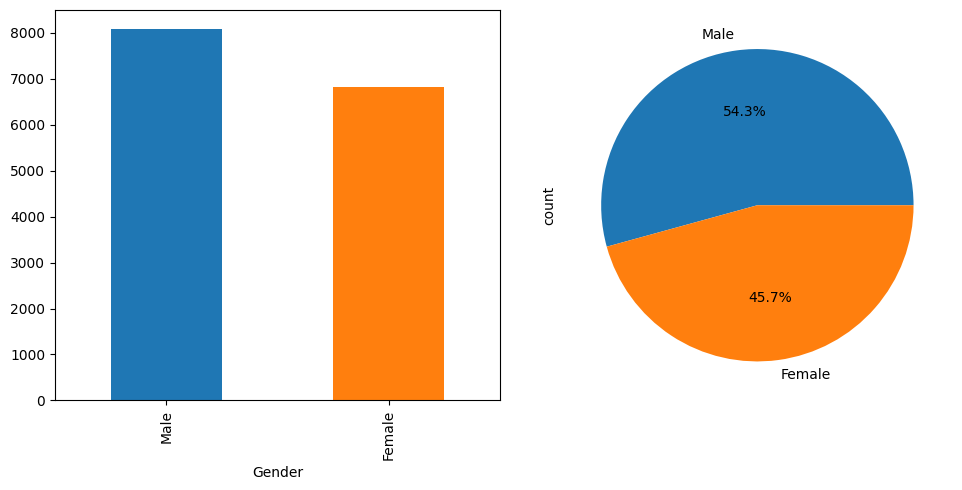

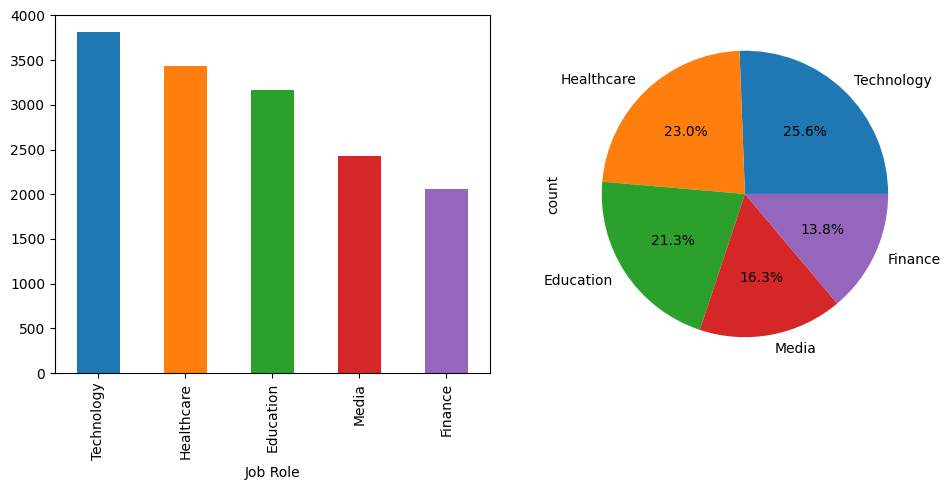

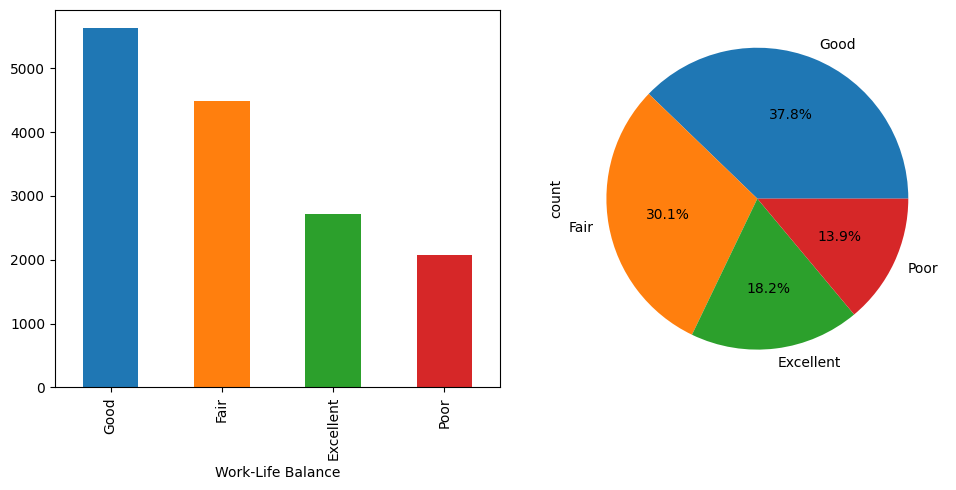

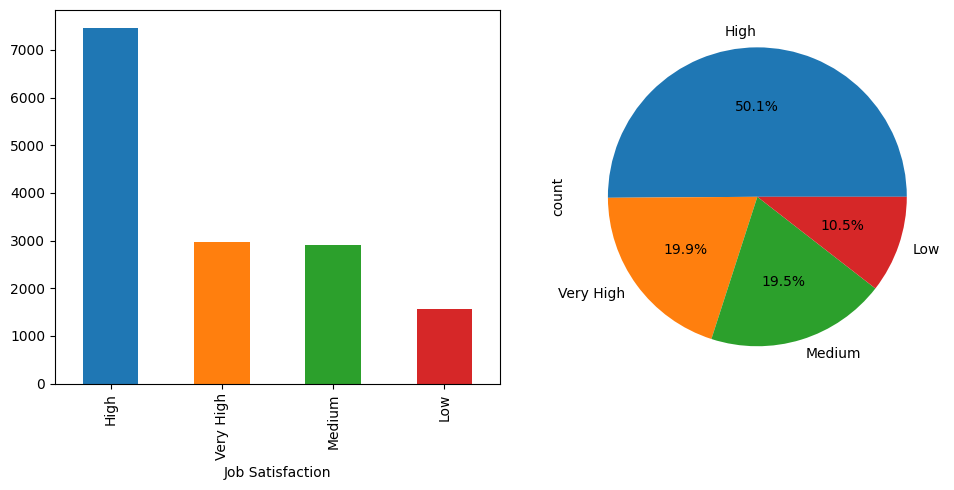

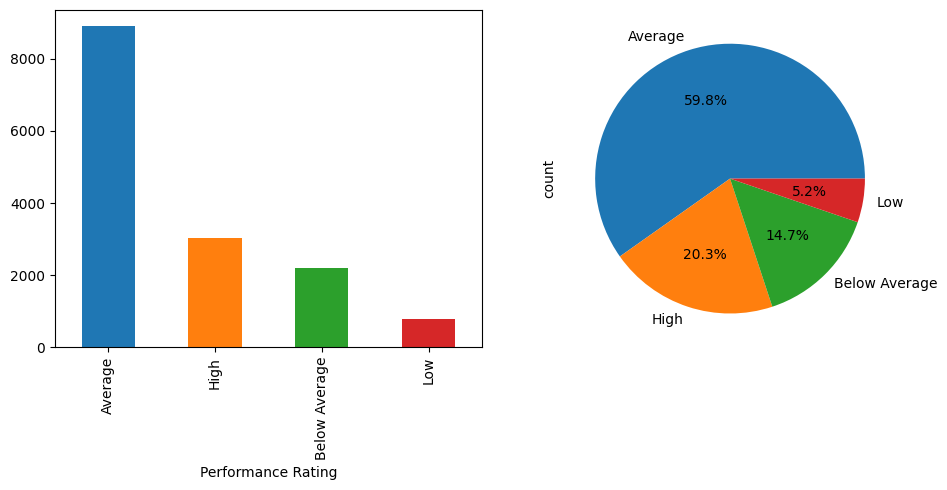

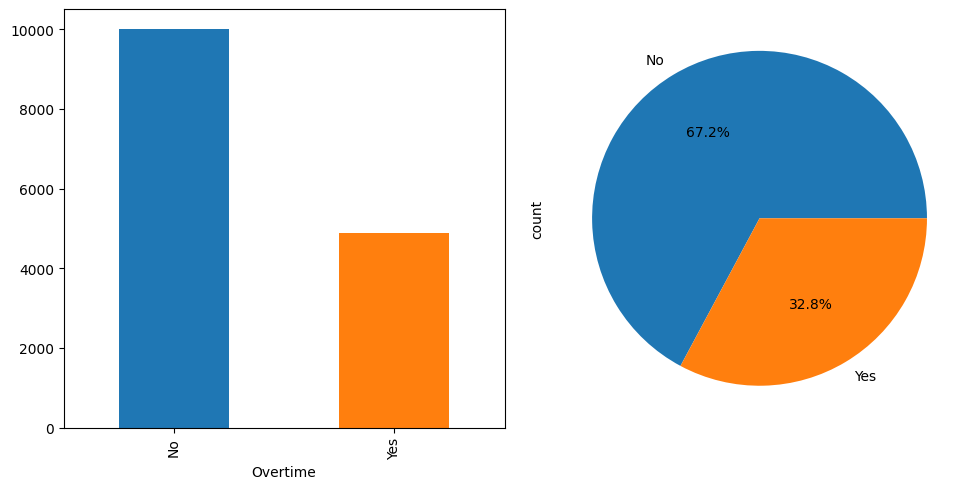

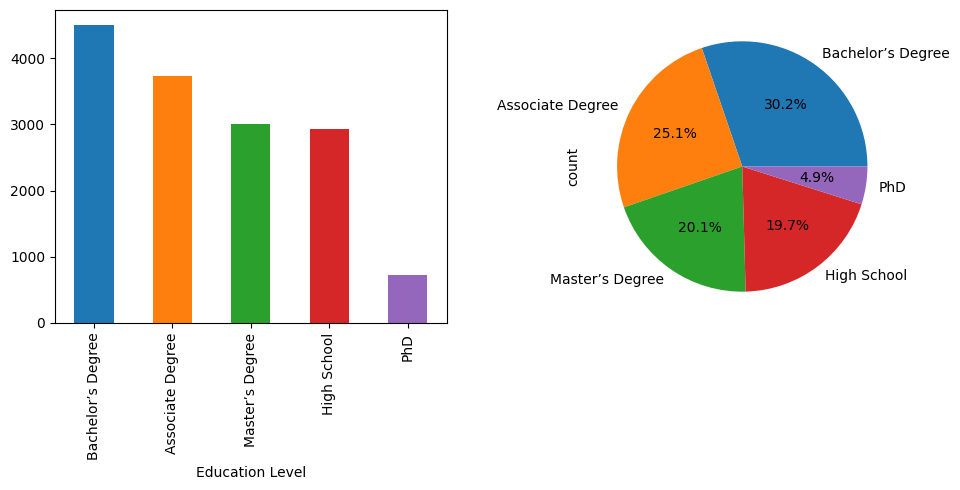

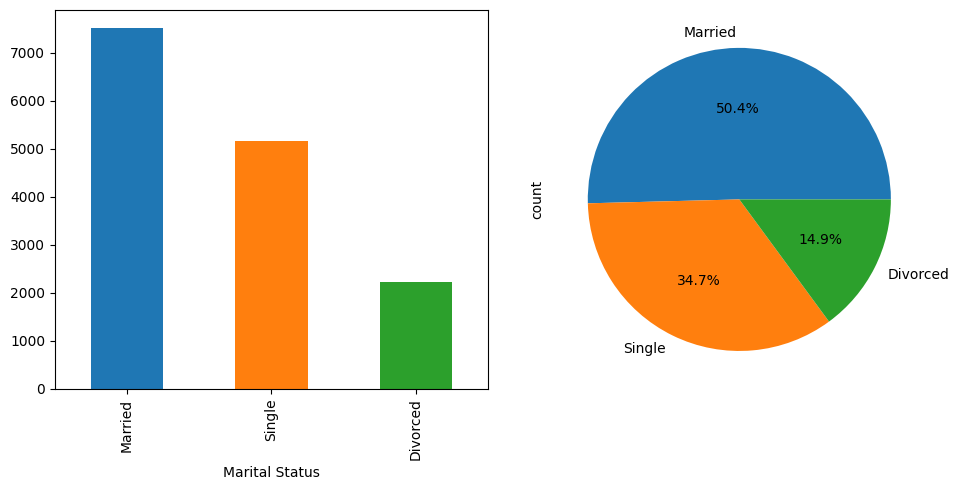

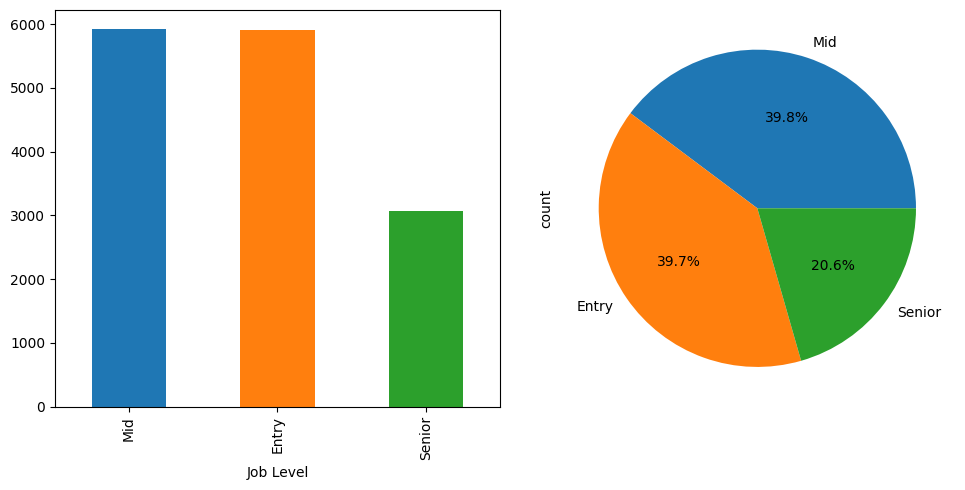

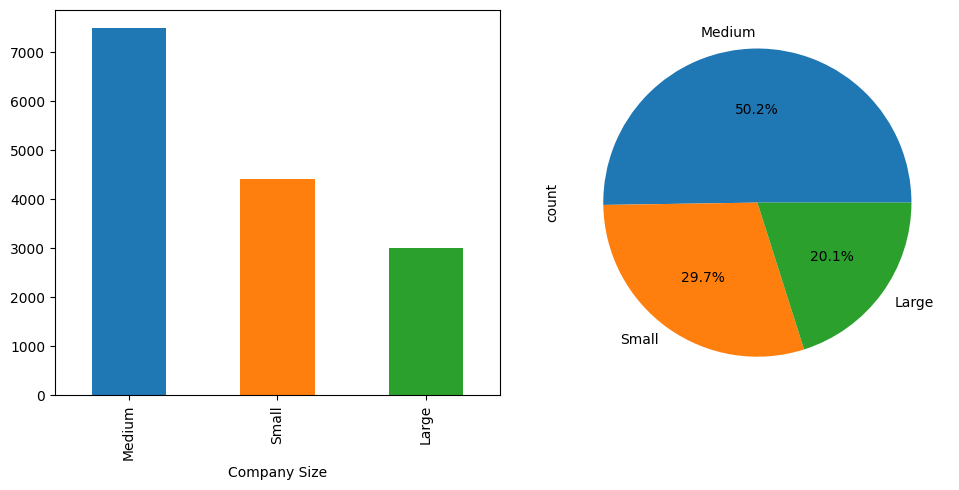

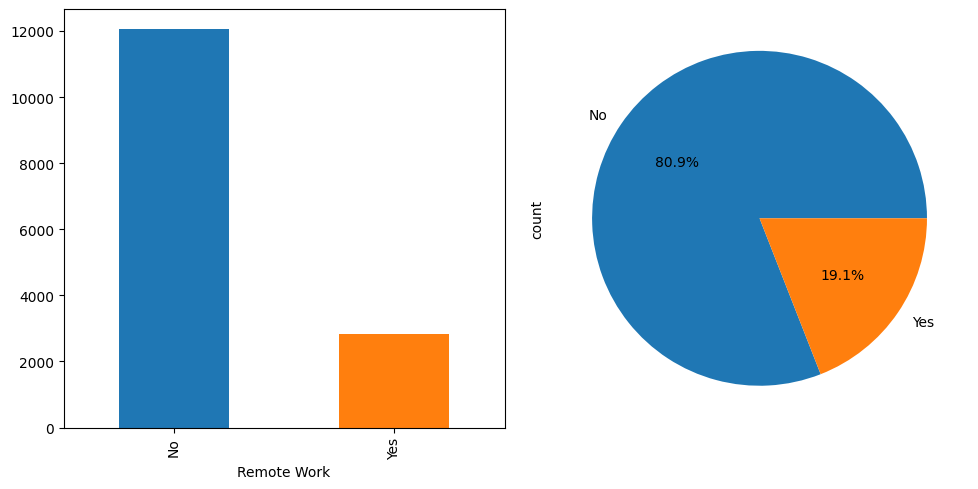

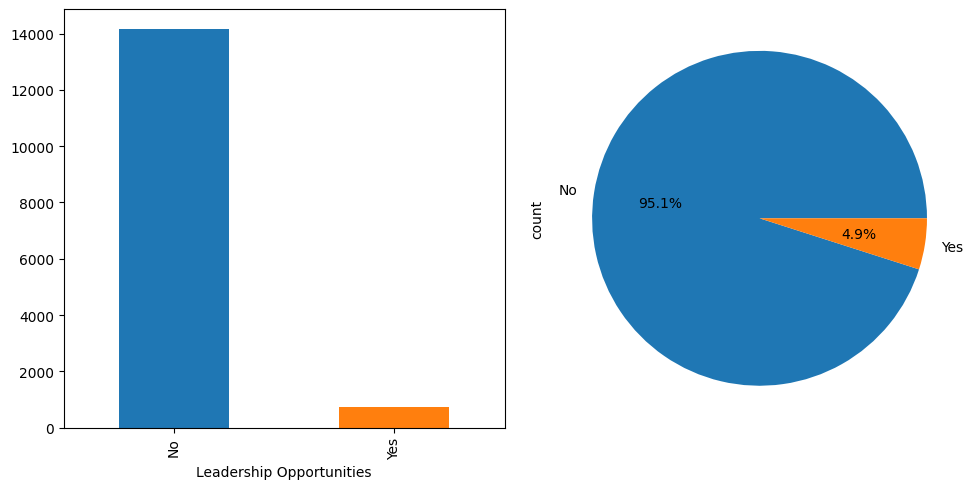

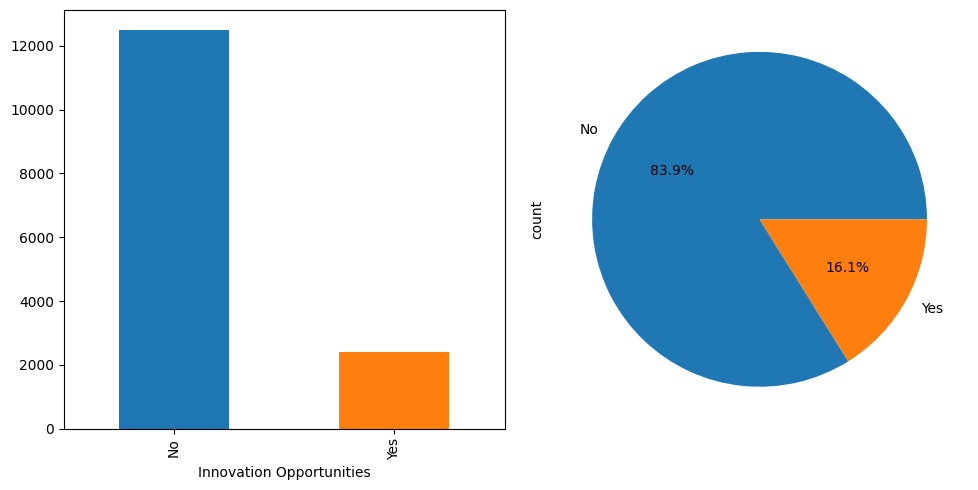

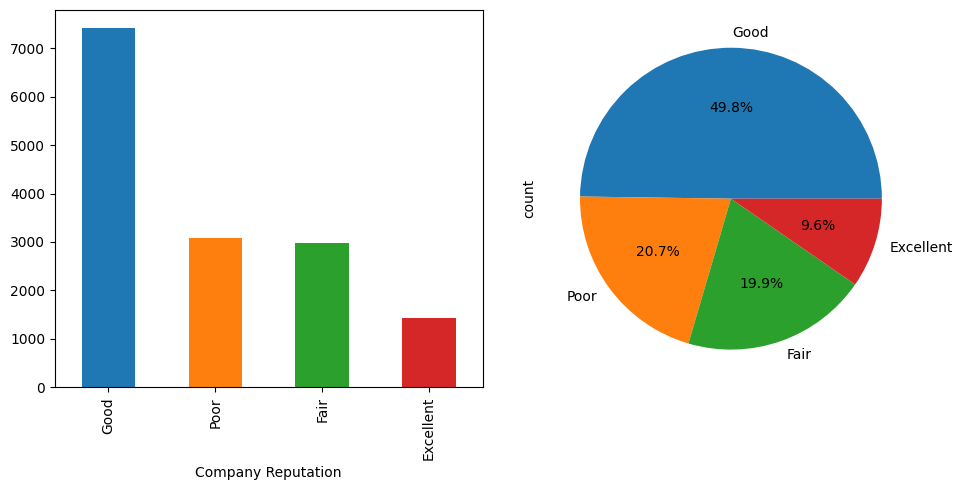

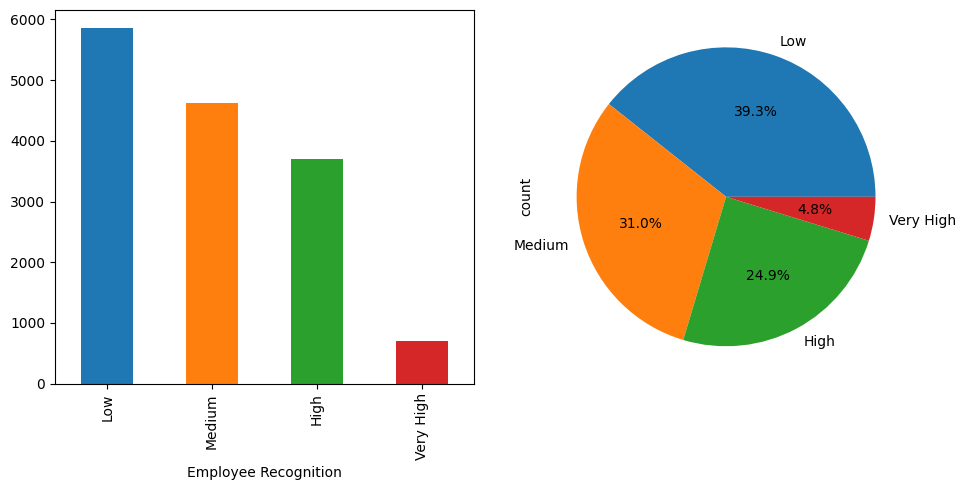

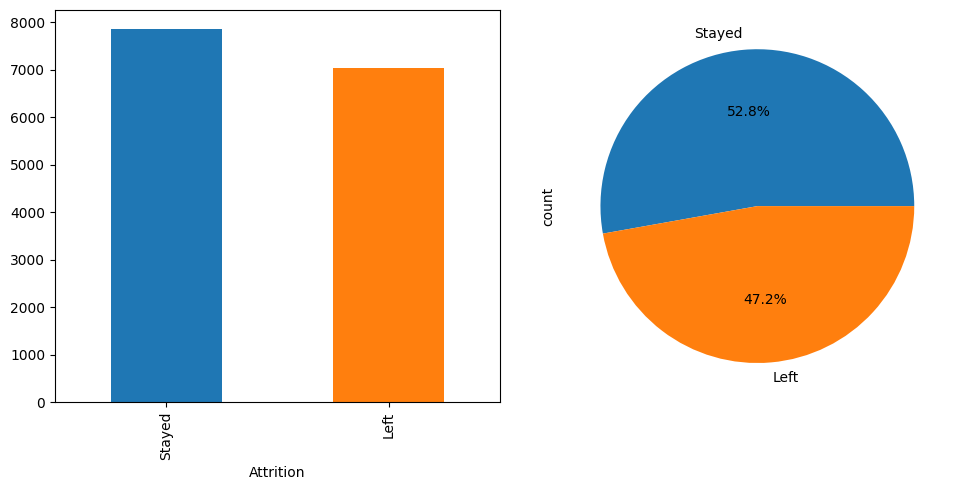

In [48]:
# Loop through each feature in the hrdata_object list
for feature_name in hrdata_object:
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    # Plot the value counts of the categorical feature as a bar chart
    hrdata[feature_name].value_counts().plot(kind='bar', color=sns.color_palette())
    plt.subplot(1, 2, 2)
    # Plot the value counts as a pie chart, with percentage labels
    hrdata[feature_name].value_counts().plot.pie(autopct='%1.1f%%')
    plt.tight_layout()
    plt.show()

Our target variable Attrition is not significantly imbalanced.That is the distribution of the classes within the target variable is relatively even.

**Relation of Age to Target**

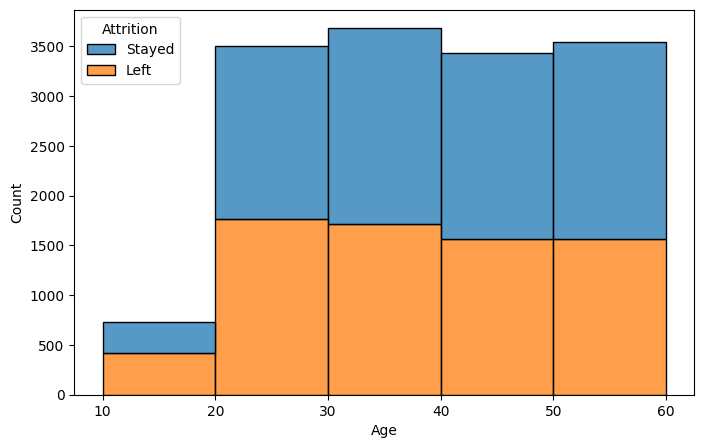

In [49]:
# Create a stacked histogram using Seaborn
plt.figure(figsize=(8,5))
sns.histplot(data=hrdata, x='Age', hue='Attrition', multiple='stack', bins=[10,20,30,40,50,60])
plt.show()



*   The proportion of employees who stayed and left is nearly equal across different age ranges. .
*   Does not bring much insight.




**Relation of Overtime to Attrition**

<Axes: xlabel='Overtime', ylabel='count'>

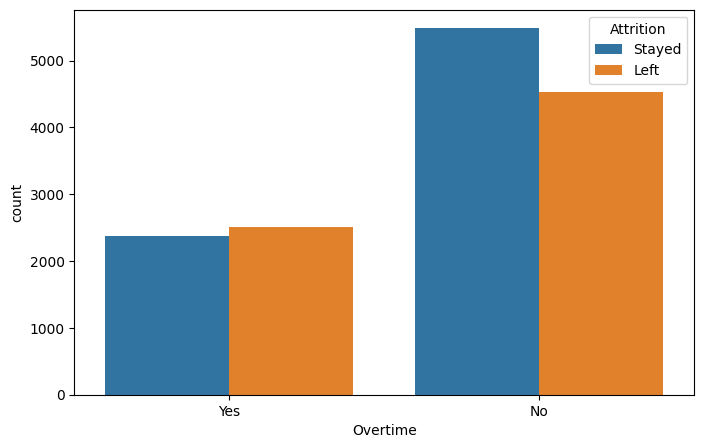

In [50]:
plt.figure(figsize=(8,5))
# Create a count plot for the 'Overtime' feature, with separate bars for each 'Attrition' category
sns.countplot(data=hrdata, x='Overtime', hue='Attrition')

Employees who work overtime have a slightly higher likelihood of leaving.

**Relation of Remote Work to Attrition**

<Axes: xlabel='Remote Work', ylabel='count'>

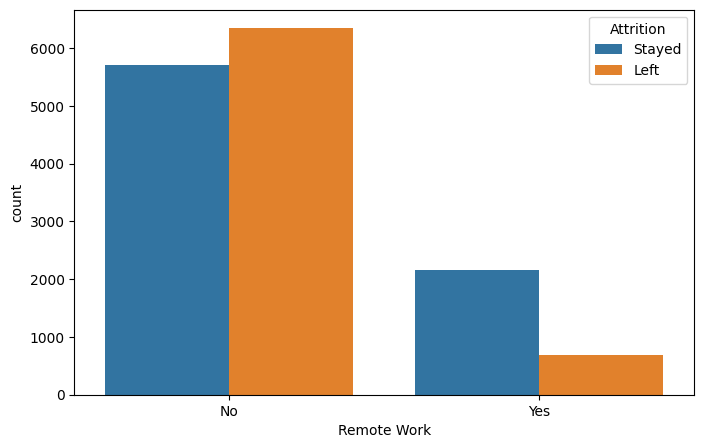

In [51]:
# Create a count plot using Seaborn
plt.figure(figsize=(8,5))
sns.countplot(data=hrdata, x='Remote Work', hue='Attrition')

Employees who do remote work are significantly more likely to stay than leave.

**Relation of Leadership Opportunities to Attrition**

<Axes: xlabel='Leadership Opportunities', ylabel='count'>

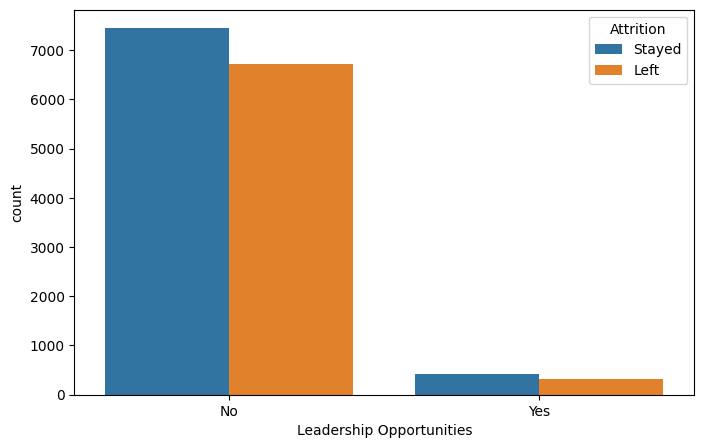

In [52]:
plt.figure(figsize=(8,5))
# Create a count plot to visualize the relationship between Leadership Opportunities and Attrition
sns.countplot(data=hrdata, x='Leadership Opportunities', hue='Attrition')

There is a clear difference in attrition between employees with leadership opportunities and those without. Those who have leadership opportunities are less likely to leave, indicating that growth and development opportunities are key factors in employee retention.

**Relation of Innovation Opportunities to Attrition**

<Axes: xlabel='Innovation Opportunities', ylabel='count'>

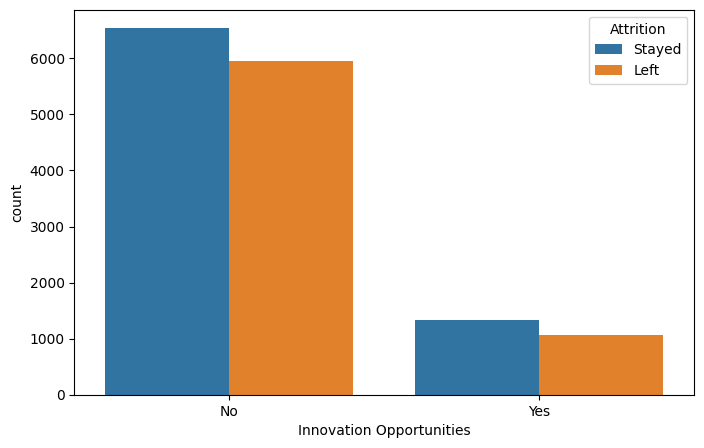

In [53]:
plt.figure(figsize=(8,5))
# Create a count plot to visualize the relationship between Innovation Opportunities and Attrition
sns.countplot(data=hrdata, x='Innovation Opportunities', hue='Attrition')

Employees with innovation opportunities are less likely to leave, suggesting that participation in innovative projects enhances employee satisfaction and retention.

**Relation of Gender to Target**

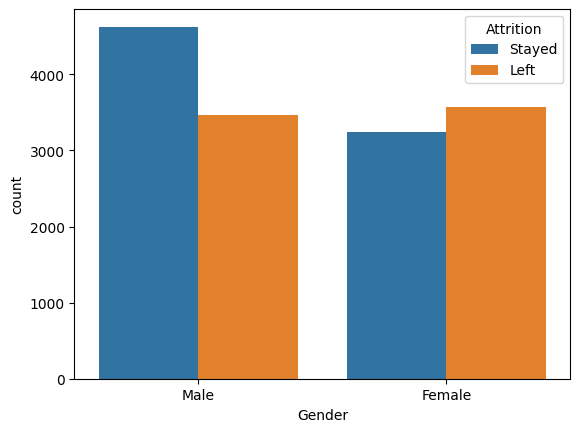

In [54]:
# Create a count plot to visualize the relationship between Gender and Attrition
sns.countplot(data=hrdata, x='Gender', hue='Attrition')
plt.show()

There is a slight imbalance in the attrition proportion, but it doesn't provide significant insight.

**Relation of Company Tenure and Years at Company with Attrition rate**

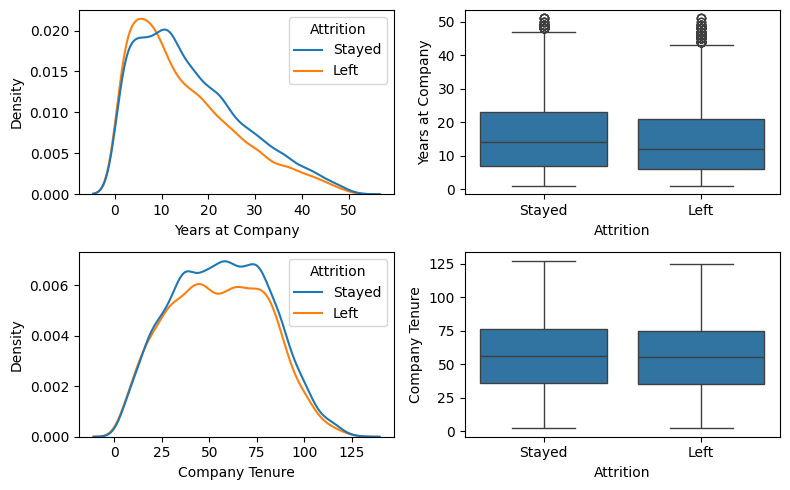

In [55]:
plt.figure(figsize=(8,5))
#visualize the distribution of 'Years at Company' with respect to 'Attrition'
plt.subplot(2,2,1)
sns.kdeplot(data=hrdata, x='Years at Company', hue='Attrition')
plt.subplot(2,2,2)
sns.boxplot(data=hrdata, y='Years at Company', x='Attrition')
#visualize the distribution of 'Company Tenure' with respect to 'Attrition'
plt.subplot(2,2,3)
sns.kdeplot(data=hrdata, x='Company Tenure', hue='Attrition')
plt.subplot(2,2,4)
sns.boxplot(data=hrdata, y='Company Tenure', x='Attrition')

plt.tight_layout()
plt.show()

**Years at Company**<br>
A larger proportion of employees have been with the company for a shorter duration, and higher attrition rates are observed among those with fewer years at the company. This suggests that the company may struggle with retaining employees during their initial years.

**Company Tenure**<br>
The attrition rate is higher among employees with lower company tenure. However, the column, defined as the total number of years an employee has worked in the industry, shows ranges of 80-100+ years, which seems unrealistic.

**Relation of Performance Rating to Target**

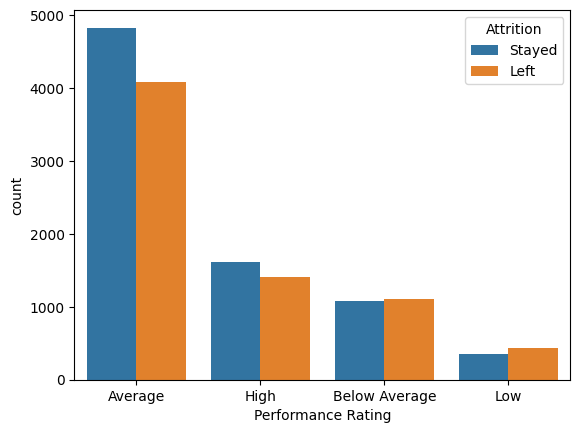

In [56]:
# Create a count plot to analyze the relationship between Performance Rating and Attrition
sns.countplot(data=hrdata, x='Performance Rating', hue='Attrition')
plt.show()



*   Employees with Low and Below Average ratings are more likely to leave.
*   In contrast, those with Average and High ratings have a greater chance of staying.



 **Relation of Number of Promotions to Target**

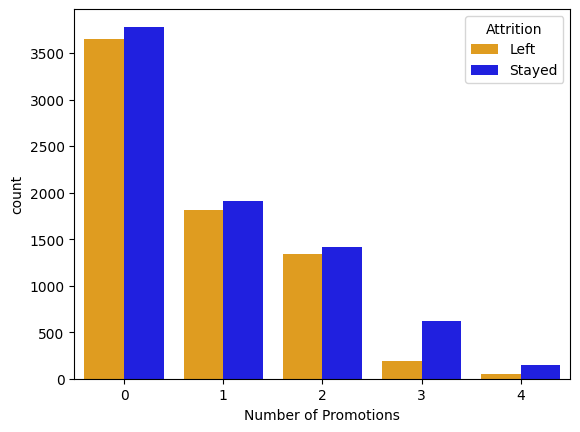

In [57]:
# Create a count plot to examine the relationship between the number of promotions and attrition
sns.countplot(data=hrdata, x='Number of Promotions', hue='Attrition', palette={'Stayed': 'blue', 'Left': 'orange'})
plt.show()



*   For employees with 0 to 2 promotions, the numbers who stay and leave are nearly equal.
*   However, for those with 3 to 4 promotions, the number of employees who stayed increased significantly.



**Relation of Marital Status to Target**

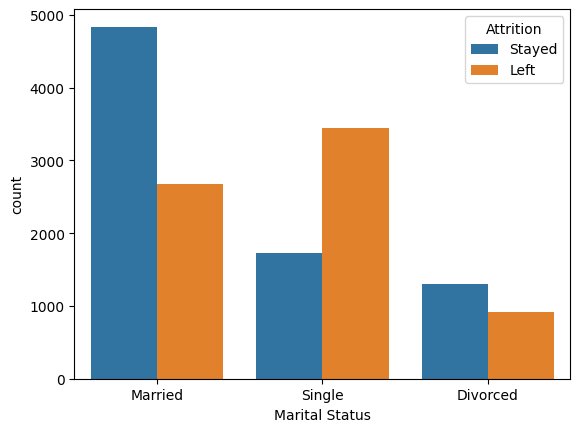

In [58]:
# Create a count plot to explore the relationship between Marital Status and Attrition
sns.countplot(data=hrdata, x='Marital Status', hue='Attrition')
plt.show()



*   A significant number of single employees left their jobs.
*   In contrast, married employees were more likely to stay.



**Relation of Job Level to Target**

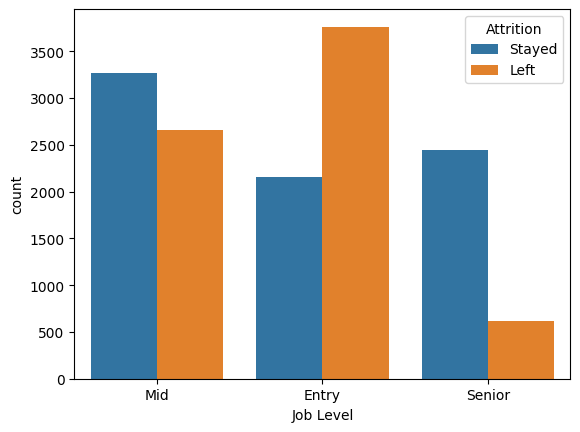

In [59]:
# Create a count plot to analyze the relationship between Job Level and Attrition
sns.countplot(data=hrdata, x='Job Level', hue='Attrition')
plt.show()

A significant number of entry-level employees left their jobs.

**BUILDING A BASELINE MODEL**

In [60]:
hrdata

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [61]:
# Map 'Attrition' values: 'Left' is converted to 1 and 'Stayed' is converted to 0
hrdata['Attrition'] = hrdata['Attrition'].map({'Left': 1, 'Stayed': 0})

In [62]:
hrdata

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,0
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,1
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,0
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,1
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,0
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,1
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,1
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,0


In [63]:
# Select only the numeric columns from the DataFrame to create a new DataFrame for analysis
hrdata_base=hrdata.select_dtypes(include=[np.number])

In [65]:
# Import the RandomForestClassifier class from the sklearn.ensemble module for building and training a random forest model
from sklearn.ensemble import RandomForestClassifier

In [66]:
# Drop the 'Employee ID' column from the DataFrame as it is not needed for analysis or modeling
hrdata.drop('Employee ID', inplace=True, axis=1)

In [67]:
X=hrdata_base.drop(['Attrition'],axis=1)     #Separating Feature and target columns
y=hrdata_base['Attrition']

In [68]:
rf = RandomForestClassifier(n_estimators=150,
                           n_jobs=-1,
                           oob_score=True)        #Instantiate RandomForestRegressor with 150 trees in the forest
rf.fit(X,y)                                       #Fit the Baseline  model
oob_score = rf.oob_score_                         #Get the oob score from fitted model
print(f"OOB score {oob_score:.4f}")

OOB score 0.5509


In [69]:
avg_oob=[]
for i in range(10):
    rf = RandomForestClassifier(n_estimators=150,
                           n_jobs=-1,
                           oob_score=True)          #Instantiate RandomForestRegressor with 150 trees in the forest
    rf.fit(X,y)                                     #Fit the Baseline  model
    oob_score = rf.oob_score_                       #Get the oob score from fitted model
    avg_oob.append(oob_score)
average_oob_score_baseline = np.mean(avg_oob)       #calculate the average oob score over the 10 iterations
print(f"Average OOB Score over 10 runs: {average_oob_score_baseline:.4f}")

Average OOB Score over 10 runs: 0.5538


**BUILDING A FINAL MODEL**

**DEALING CATEGORICAL VARIABLES**

**ONE-HOT ENCODING**

In [70]:
# The specified columns will be one-hot encoded to create binary variables
no_order_variables = ['Gender', 'Job Role', 'Overtime', 'Marital Status', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities']
hrdata = pd.get_dummies(data=hrdata, columns=no_order_variables, dtype=int)

**LABEL-ENCODING**

In [71]:
# Import the LabelEncoder class from the sklearn.preprocessing module for encoding categorical labels as integers
from sklearn.preprocessing import LabelEncoder

In [72]:
ordered_variables = ['Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Education Level', 'Job Level', 'Company Size', 'Company Reputation', 'Employee Recognition']

In [73]:
# Initialize a LabelEncoder object to encode categorical labels
label_encoder = LabelEncoder()
# Loop through each column specified in 'ordered_variables' and encode the categorical labels as integers
for col in ordered_variables:
  hrdata[col] = label_encoder.fit_transform(hrdata[col])

In [74]:
X=hrdata.drop(['Attrition'],axis=1)     #Separating Feature and target columns
y=hrdata['Attrition']

In [75]:
avg_oob=[]
for i in range(10):
    rf = RandomForestClassifier(n_estimators=150,
                           n_jobs=-1,
                           oob_score=True)          #Instantiate RandomForestRegressor with 150 trees in the forest
    rf.fit(X,y)                                     #Fit the Final  model
    oob_score = rf.oob_score_                       #Get the oob score from fitted model
    avg_oob.append(oob_score)
average_oob_score_final = np.mean(avg_oob)       #calculate the average oob score over the 10 iterations
print(f"Average OOB Score over 10 runs: {average_oob_score_final:.4f}")

Average OOB Score over 10 runs: 0.7327


In [76]:
# Import the train_test_split function from the sklearn.model_selection module for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  #splitting the feature and target variable into training and testing data.

rf = RandomForestClassifier(n_estimators=100)   ##Instantiate RandomForestRegressor

rf.fit(X_train, y_train)     #Fit the model using training data

RandomForestClassifier()

In [78]:
r2 = rf.score(X_test,y_test)            #Calculating R^2 value on test data.
print( f"{r2:.4f}" )

0.7265


In [79]:
#Percentage difference
relative_improvement=((average_oob_score_final-average_oob_score_baseline)/(1-average_oob_score_baseline))*100
print(f"percent difference between the oob score of baseline and final model {relative_improvement}")

percent difference between the oob score of baseline and final model 40.083029993080835


In [ ]:
!pip install rfpimp

In [89]:
# Create a Pandas Series to store feature importances from the trained Random Forest model
imp=pd.Series(data=rf.feature_importances_,index=rf.feature_names_in_)

In [90]:
imp

,0
Age,0.067861
Years at Company,0.066990
Monthly Income,0.076676
Work-Life Balance,0.041573
Job Satisfaction,0.027144
Performance Rating,0.024267
Number of Promotions,0.038140
Distance from Home,0.080514
Education Level,0.039838
Number of Dependents,0.039611
